# Project 6 : Clean and Analyse Exit Surveys 

Target : In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data here here.
In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer ?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees ?

Source :

Author : HUYNH Tram-Anh


In [71]:
import pandas as pd
import numpy as np

dete = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe = pd.read_csv('tafe_survey.csv',na_values='Not Stated')

In [72]:
dete.shape

(822, 56)

In [73]:
dete.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [74]:
tafe.shape

(702, 72)

In [75]:
tafe.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [76]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [77]:
dete.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [78]:
tafe.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [79]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [80]:
dete.iloc[:20,:19]

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False
6,7,Age Retirement,05/2012,1972.0,2007.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,False,False,False,True,True,False,False,False,False
7,8,Age Retirement,05/2012,1988.0,1990.0,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False


In [81]:
dete.iloc[:20,18:39]

,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,...,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills
0,False,False,False,False,False,False,False,False,False,True,...,A,N,N,N,A,A,A,A,N,N
1,False,False,False,False,False,False,False,False,False,False,...,A,N,N,N,N,A,A,A,N,N
2,False,False,False,False,False,False,False,False,False,True,...,N,N,N,N,N,N,N,N,N,N
3,False,False,False,False,False,False,False,False,False,False,...,N,N,N,A,A,N,N,A,A,A
4,False,False,False,False,False,False,False,True,False,False,...,A,N,N,D,D,N,A,A,A,A
5,False,True,True,False,False,False,False,False,False,False,...,SD,SD,D,SD,D,D,A,NaN,SA,A
6,False,False,False,False,False,False,False,False,False,False,...,N,SD,D,A,A,D,D,SA,D,N
7,False,False,False,False,False,False,False,False,False,False,...,NaN,A,A,SA,SA,SA,SA,A,SA,SA
8,False,False,False,False,False,False,False,False,False,False,...,N,D,D,N,SD,SD,D,D,N,A
9,False,False,False,False,False,False,False,False,False,False,...,SD,SD,SD,A,SD,SD,SD,SD,SD,SD


In [82]:
dete.iloc[:20,38:]

,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,A,A,N,N,D,A,D,D,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,N,N,D,D,N,N,D,D,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,SA,A,NaN,A,N,A,SA,A,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,A,NaN,SD,SD,N,D,SD,D,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [83]:
tafe.iloc[:5,:19]

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agree
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,Agree
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,Agree
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,Agree
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,NaN,Agree


In [84]:
tafe.iloc[:5,18:39]

,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,...,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT]
0,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Agree,Agree,Agree,Agree
1,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Agree,...,Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Strongly Agree,Agree
2,Agree,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Agree,Agree,Agree,...,Neutral,Neutral,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree
3,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
4,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,...,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree


In [85]:
dete['Cease Date'].value_counts()

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2014      2
02/2014      2
04/2013      2
07/2014      2
08/2012      2
07/2012      1
09/2010      1
07/2006      1
11/2012      1
2014         1
09/2014      1
2010         1
Name: Cease Date, dtype: int64

## II. 1 Drop columns 

In [86]:
dete.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [87]:
dete.columns.get_loc('Professional Development')

28

In [88]:
dete.columns.get_loc('Health & Safety')

48

In [89]:
dete_upd = dete.drop(dete.columns[28:49],axis=1)
dete_upd.shape

(822, 35)

In [90]:
tafe.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [91]:
tafe.columns.get_loc('Main Factor. Which of these was the main factor for leaving?')

17

In [92]:
tafe.columns.get_loc('Workplace. Topic:Would you recommend the Institute as an employer to others?')

65

In [93]:
tafe_upd = tafe.drop(tafe.columns[17:66],axis=1) #add cai bang vao 
tafe_upd.shape

(702, 23)

# II.2 Clean columns
## II.2.1 DETE

In [94]:
dete_upd.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [95]:
dete_upd['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [96]:
dete_upd.columns = dete_upd.columns.str.strip().str.lower().str.replace(' ','_')
dete_upd.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [97]:
dete_upd.rename({'separationtype':'separation_type'},axis=1,inplace=True) #inplace=True : ghi de len du lieu goc ban dau

In [98]:
dete_upd.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [99]:
dete_upd['cease_date'].value_counts(dropna=False) #Not Stated : du lieu ko dc thong ke, ko co thong so -> muon xoa coi phan doc file

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
NaN         34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2013      2
08/2012      2
04/2014      2
07/2014      2
02/2014      2
2014         1
09/2014      1
07/2006      1
09/2010      1
2010         1
11/2012      1
07/2012      1
Name: cease_date, dtype: int64

In [100]:
dete_upd['cease_date'] = dete_upd['cease_date'].str[-4:].astype(float)

In [101]:
dete_upd['cease_date'].value_counts(dropna=False)

2013.0    380
2012.0    354
2014.0     51
NaN        34
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [102]:
dete_upd['institute_service'] = dete_upd['cease_date'] - dete_upd['dete_start_date']

In [103]:
dete_upd['institute_service'].value_counts(bins=10)

(-0.051000000000000004, 5.0]    183
(5.0, 10.0]                      91
(20.0, 25.0]                     80
(10.0, 15.0]                     77
(15.0, 20.0]                     67
(35.0, 40.0]                     65
(30.0, 35.0]                     59
(40.0, 45.0]                     53
(25.0, 30.0]                     38
(45.0, 50.0]                      6
Name: institute_service, dtype: int64

In [104]:
dete_upd['age'].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: age, dtype: int64

In [105]:
tafe_upd['CurrentAge. Current Age'].value_counts()

56 or older      162
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64

In [106]:
dete_upd['age'] = dete_upd['age'].str.replace('56-60','56 or older').str.replace('61 or older','56 or older')

dete_upd['age'].value_counts()

In [107]:
dete_upd.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [108]:
convert_dete = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security','work_location', 'employment_conditions','work_life_balance','workload']

In [109]:
dete_upd[convert_dete].head()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
0,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False


In [110]:
dete_upd['dissatified'] = dete_upd[convert_dete].any(axis=1,skipna=False)  #any() : xuat hien true trong bool tra ve true ben dissatified

In [111]:
dete_upd['dissatified'].value_counts()

False    447
True     375
Name: dissatified, dtype: int64

## II.2.2 TAFE

In [112]:
tafe_upd.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [113]:
tafe_upd.rename({'Record ID':'id','CESSATION YEAR':'cease_date','Reason for ceasing employment':'separation_type','CurrentAge. Current Age':'age','Gender. What is your Gender?':'gender','LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service','Classification. Classification':'position','Employment Type. Employment Type':'employment_status'},axis=1,inplace=True)

In [114]:
tafe_upd.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [115]:
tafe_upd['age']=tafe_upd['age'].str.replace('  ','-')
tafe_upd['age'].value_counts()

56 or older      162
51-55             82
41-45             80
46-50             59
31-35             52
36-40             51
26-30             50
21-25             44
20 or younger     16
Name: age, dtype: int64

In [116]:
tafe['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         371
NaN                                       265
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [117]:
tafe['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      360
NaN                    265
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [118]:
def update_val(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [119]:
tafe_convert = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_upd[tafe_convert]=tafe_upd[tafe_convert].applymap(update_val)

In [120]:
tafe_upd[tafe_convert]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
0,NaN,NaN
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
697,False,False
698,False,False
699,False,False
700,NaN,NaN


In [121]:
tafe_upd['Contributing Factors. Dissatisfaction'].value_counts()

False    371
True      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [122]:
tafe_upd['Contributing Factors. Job Dissatisfaction'].value_counts()

False    360
True      77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [123]:
tafe_upd['dissatified']=tafe_upd[tafe_convert].any(axis=1,skipna=False)
tafe_upd['dissatified'].value_counts(dropna=False)

False    322
NaN      265
True     115
Name: dissatified, dtype: int64

## II.2.3 Combine

In [124]:
dete_upd.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatified'],
      dtype='object')

In [125]:
dete_keep_col = ['id', 'separation_type', 'cease_date','employment_status','gender', 'age','institute_service', 'dissatified','position']

In [126]:
tafe_upd.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatified'],
      dtype='object')

In [127]:
tafe_keep_col = ['id', 'cease_date', 'separation_type','gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatified']

In [128]:
dete_keep = dete_upd[dete_keep_col]
tafe_keep = tafe_upd[tafe_keep_col]

In [129]:
dete_keep['institute'] = 'DETE'
tafe_keep['institude'] = 'TAFE'

<ipython-input-129-74b46a7c7c6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_keep['institute'] = 'DETE'
<ipython-input-129-74b46a7c7c6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_keep['institude'] = 'TAFE'


In [130]:
combined=pd.concat([dete_keep,tafe_keep])

In [131]:
combined

,id,separation_type,cease_date,employment_status,gender,age,institute_service,dissatified,position,institute,role_service,institude
0,1.000000e+00,Ill Health Retirement,2012.0,Permanent Full-time,Male,56 or older,28.0,True,Public Servant,DETE,NaN,NaN
1,2.000000e+00,Voluntary Early Retirement (VER),2012.0,Permanent Full-time,Male,56 or older,NaN,False,Public Servant,DETE,NaN,NaN
2,3.000000e+00,Voluntary Early Retirement (VER),2012.0,Permanent Full-time,Male,56 or older,1.0,False,Schools Officer,DETE,NaN,NaN
3,4.000000e+00,Resignation-Other reasons,2012.0,Permanent Full-time,Female,36-40,7.0,False,Teacher,DETE,NaN,NaN
4,5.000000e+00,Age Retirement,2012.0,Permanent Full-time,Female,56 or older,42.0,True,Head of Curriculum/Head of Special Education,DETE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Resignation,2013.0,Temporary Full-time,Male,51-55,1-2,False,Teacher (including LVT),NaN,1-2,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,TAFE
699,6.350704e+17,Resignation,2013.0,Permanent Full-time,Female,51-55,5-6,False,Teacher (including LVT),NaN,1-2,TAFE
700,6.350712e+17,Contract Expired,2013.0,Temporary Full-time,Female,41-45,1-2,NaN,Professional Officer (PO),NaN,1-2,TAFE


In [132]:
combined.head()

,id,separation_type,cease_date,employment_status,gender,age,institute_service,dissatified,position,institute,role_service,institude
0,1.0,Ill Health Retirement,2012.0,Permanent Full-time,Male,56 or older,28.0,True,Public Servant,DETE,NaN,NaN
1,2.0,Voluntary Early Retirement (VER),2012.0,Permanent Full-time,Male,56 or older,NaN,False,Public Servant,DETE,NaN,NaN
2,3.0,Voluntary Early Retirement (VER),2012.0,Permanent Full-time,Male,56 or older,1.0,False,Schools Officer,DETE,NaN,NaN
3,4.0,Resignation-Other reasons,2012.0,Permanent Full-time,Female,36-40,7.0,False,Teacher,DETE,NaN,NaN
4,5.0,Age Retirement,2012.0,Permanent Full-time,Female,56 or older,42.0,True,Head of Curriculum/Head of Special Education,DETE,NaN,NaN


In [133]:
combined['institute_service'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
1.0                    36
5.0                    34
0.0                    31
3.0                    31
4.0                    28
6.0                    27
2.0                    23
22.0                   22
37.0                   21
9.0                    20
15.0                   18
13.0                   18
7.0                    17
43.0                   17
23.0                   17
17.0                   16
24.0                   16
16.0                   15
21.0                   15
38.0                   15
8.0                    14
35.0                   14
39.0                   14
14.0                   14
12.0                   14
11.0                   13
19.0                   13
42.0                   13
10.0                   13
20.0                   12
32.0                   12
34.0        

In [134]:
combined['institute_service'] = combined['institute_service'].astype('str').str.extract(r'(\d+)').astype('float')

In [136]:
combined['institute_service'].value_counts(bins=10)

(-0.051000000000000004, 5.0]    576
(10.0, 15.0]                    166
(15.0, 20.0]                    138
(5.0, 10.0]                     134
(20.0, 25.0]                     80
(35.0, 40.0]                     65
(30.0, 35.0]                     59
(40.0, 45.0]                     53
(25.0, 30.0]                     38
(45.0, 50.0]                      6
Name: institute_service, dtype: int64

In [137]:
def service_cat(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'Newbie'
    elif val <= 6:
        return 'Experienced'
    elif val <= 10:
        return 'Established'
    else:
        return 'Veteran'

In [138]:
combined['service_cat'] = combined['institute_service'].apply(service_cat)

In [140]:
combined['service_cat'].value_counts()

Veteran        605
Newbie         339
Experienced    264
Established    107
Name: service_cat, dtype: int64

In [141]:
combined['age'].value_counts()

56 or older      558
51-55            185
41-45            141
46-50            122
26-30            107
36-40            102
31-35             91
21-25             84
20 or younger     17
Name: age, dtype: int64

In [142]:
combined['age'] = combined['age'].astype('str').str.extract(r'(\d+)').astype('float')

In [143]:
combined['age'].value_counts()

56.0    558
51.0    185
41.0    141
46.0    122
26.0    107
36.0    102
31.0     91
21.0     84
20.0     17
Name: age, dtype: int64

In [147]:
def age_cat(val):
    if pd.isnull(val):
        return np.nan
    elif val < 31:
        return 'Junior'
    elif val < 46:
        return 'Middle'
    else:
        return 'Senior'

In [148]:
combined['age_cat'] = combined['age'].apply(age_cat)

In [149]:
combined['age_cat'].value_counts()

Senior    865
Middle    334
Junior    208
Name: age_cat, dtype: int64

In [150]:
combined.isnull().sum() #thieu ct region

id                     0
separation_type        1
cease_date            41
employment_status    111
gender               130
age                  117
institute_service    209
dissatified          265
position             111
institute            702
role_service         928
institude            822
service_cat          209
age_cat              117
dtype: int64

In [152]:
#combined=combined.drop(['region','role_service'])

KeyError: "['role_service'] not found in axis"

In [154]:
combined['dissatified'].value_counts(dropna = False)

False    769
True     490
NaN      265
Name: dissatified, dtype: int64

In [155]:
combined['dissatified'] = combined['dissatified'].fillna(False)

In [156]:
combined.isnull().sum()

id                     0
separation_type        1
cease_date            41
employment_status    111
gender               130
age                  117
institute_service    209
dissatified            0
position             111
institute            702
role_service         928
institude            822
service_cat          209
age_cat              117
dtype: int64

In [157]:
combined[['service_cat','age_cat']]

,service_cat,age_cat
0,Veteran,Senior
1,NaN,Senior
2,Newbie,Senior
3,Established,Middle
4,Veteran,Senior
...,...,...
697,Newbie,Senior
698,NaN,NaN
699,Experienced,Senior
700,Newbie,Middle


In [158]:
drop_bool = (combined['service_cat']).isnull()&(combined['age_cat'].isnull())

In [159]:
drop_bool.value_counts()

False    1412
True      112
dtype: int64

In [161]:
combined.drop(combined[drop_bool].index,inplace=True)

In [164]:
combined.isnull().sum()

id                     0
separation_type        0
cease_date            34
employment_status      2
gender                15
age                    3
institute_service     88
dissatified            0
position               4
institute            593
role_service         710
institude            710
service_cat           88
age_cat                3
dtype: int64

In [186]:
dete_junior_bool =(combined['institute']=='DETE')&(combined['age_cat']=='Junior')


In [187]:
combined[dete_junior_bool]['service_cat'].mode()

0    Experienced
dtype: object

In [188]:
dete_middle_bool = (combined['institute']=='DETE')&(combined['age_cat']=='Middle')


In [189]:
combined[dete_middle_bool]['service_cat'].mode()

0    Experienced
dtype: object

In [190]:
dete_senior_bool = (combined['institute']=='DETE')&(combined['age_cat']=='Senior')


In [191]:
combined[dete_senior_bool]['service_cat'].mode()

0    Veteran
dtype: object

In [192]:
#combined.loc[dete_junior_bool,'service_cat']=combined[dete_junior_bool,'service_cat'].fillna(combined[dete_junior_bool]['service_cat'].mode())

TypeError: '(0      False
4      False
5      False
6      False
7      False
       ...  
696    False
697    False
699    False
700    False
701    False
Length: 1303, dtype: bool, 'service_cat')' is an invalid key

In [174]:
#dete_middle['service_cat']=dete_middle['service_cat'].fillna(dete_middle['service_cat'].mode())

<ipython-input-174-df65a58fd914>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_middle['service_cat']=dete_middle['service_cat'].fillna(dete_middle['service_cat'].mode())


In [175]:
#dete_senior['service_cat']=dete_senior['service_cat'].fillna(dete_senior['service_cat'].mode())

<ipython-input-175-9e9d0eff111f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_senior['service_cat']=dete_senior['service_cat'].fillna(dete_senior['service_cat'].mode())


In [193]:
#tafe_middle = combined[(combined['institute']=='TAFE')&(combined['age_cat']=='Middle')]


In [194]:
#tafe_junior = combined[(combined['institute']=='TAFE')&(combined['age_cat']=='Junior')]


In [195]:
#tafe_senior = combined[(combined['institute']=='TAFE')&(combined['age_cat']=='Senior')]


In [196]:
#tafe_junior['service_cat']=tafe_junior['service_cat'].fillna(tafe_junior['service_cat'].mode())

In [197]:
combined[combined['age'].isnull()]

,id,separation_type,cease_date,employment_status,gender,age,institute_service,dissatified,position,institute,role_service,institude,service_cat,age_cat
172,173.0,Other,2012.0,Permanent Full-time,Female,NaN,37.0,True,Public Servant,DETE,NaN,NaN,Veteran,NaN
214,215.0,Resignation-Other reasons,2012.0,Permanent Part-time,Female,NaN,13.0,False,School Administrative Staff,DETE,NaN,NaN,Veteran,NaN
285,286.0,Resignation-Move overseas/interstate,2012.0,Permanent Full-time,Female,NaN,0.0,False,Cleaner,DETE,NaN,NaN,Newbie,NaN


In [199]:
dete_veteran_bool = (combined['institute']=='DETE')&(combined['service_cat']=='Veteran')
combined[dete_veteran_bool]['age_cat'].mode()

0    Senior
dtype: object

In [200]:
combined.loc[dete_veteran_bool,'age_cat']=combined.loc[dete_veteran_bool,'age_cat'].fillna('Senior')

In [201]:
dete_newbiw_bool = (combined['institute']=='DETE')&(combined['service_cat']=='Newbies')
combined.loc[dete_newbie_bool,'age_cat']=combined.loc[dete_newbie_bool,'age_cat'].fillna(combined[dete_newbie_bool]['age_cat'])

NameError: name 'dete_newbie_bool' is not defined

In [202]:
combined.isnull().sum()

id                     0
separation_type        0
cease_date            34
employment_status      2
gender                15
age                    3
institute_service     88
dissatified            0
position               4
institute            593
role_service         710
institude            710
service_cat           88
age_cat                1
dtype: int64

### Data analysis

In [203]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 701
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1303 non-null   float64
 1   separation_type    1303 non-null   object 
 2   cease_date         1269 non-null   float64
 3   employment_status  1301 non-null   object 
 4   gender             1288 non-null   object 
 5   age                1300 non-null   float64
 6   institute_service  1215 non-null   float64
 7   dissatified        1303 non-null   bool   
 8   position           1299 non-null   object 
 9   institute          710 non-null    object 
 10  role_service       593 non-null    object 
 11  institude          593 non-null    object 
 12  service_cat        1215 non-null   object 
 13  age_cat            1302 non-null   object 
dtypes: bool(1), float64(4), object(9)
memory usage: 176.1+ KB


In [204]:
combined['service_cat'].value_counts()

Veteran        548
Newbie         325
Experienced    247
Established     95
Name: service_cat, dtype: int64

In [205]:
combined[['service_cat','dissatified']]

,service_cat,dissatified
0,Veteran,True
4,Veteran,True
5,Veteran,True
6,Veteran,True
7,Veteran,False
...,...,...
696,Experienced,False
697,Newbie,False
699,Experienced,False
700,Newbie,False


In [209]:
dissatified_service = combined.groupby('service_cat')['dissatified'].mean()
dissatified_service.sort_values(ascending=False)

service_cat
Established    0.431579
Veteran        0.419708
Experienced    0.287449
Newbie         0.190769
Name: dissatified, dtype: float64

In [212]:
dissatified_ser = combined.pivot_table('dissatified','service_cat')
dissatified_ser.sort_values(ascending=False,by='dissatified')

,dissatified
service_cat,
Established,0.431579
Veteran,0.419708
Experienced,0.287449
Newbie,0.190769


<AxesSubplot:ylabel='service_cat'>

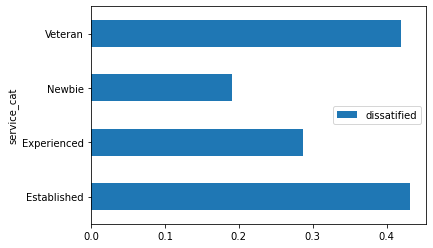

In [213]:
dissatified_ser.plot(kind='barh')

In [215]:
dete_service = combined[combined['institute']=='DETE']
dete_service = dete_service.pivot_table('dissatified','service_cat').sort_values(ascending=False, by='dissatified')
dete_service

,dissatified
service_cat,
Established,0.596154
Veteran,0.528205
Experienced,0.423077
Newbie,0.315789


<AxesSubplot:xlabel='institute', ylabel='cease_date'>

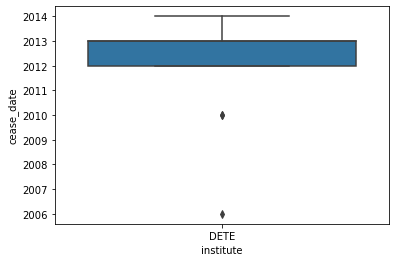

In [216]:
import seaborn as sns
sns.boxplot(x=combined.institute,y=combined.cease_date)